In [69]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(6,4))

UsageError: Line magic function `%` not found.


In [71]:
logins = pd.read_json("logins.json")
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [72]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [73]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [74]:
logins['login_time'][0]

Timestamp('1970-01-01 20:13:18')

In [75]:
logins.iloc[0]

login_time   1970-01-01 20:13:18
Name: 0, dtype: datetime64[ns]

In [76]:
logins.iloc[-1]

login_time   1970-04-13 18:54:23
Name: 93141, dtype: datetime64[ns]

## Part One

Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,such as daily cycles. If there are data quality issues, please report them.

In [77]:
# get the 15 min intervals
counts = pd.date_range(start='1970-01-01 20:00:00', end='1970-04-13 19:00:00', freq='15T')

In [78]:
# create a time series object
ts = pd.Series(np.zeros(len(counts)), index=counts)

In [79]:
ts.head()

1970-01-01 20:00:00    0.0
1970-01-01 20:15:00    0.0
1970-01-01 20:30:00    0.0
1970-01-01 20:45:00    0.0
1970-01-01 21:00:00    0.0
Freq: 15T, dtype: float64

In [80]:
logins = logins.sort_values('login_time')
logins = logins.reset_index(drop=True)
logins.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [81]:
p = 0 
for i in range(len(logins)):
    s = ts.index[p] #start time
    e = ts.index[p+1] #end time
    t = logins['login_time'][i]
    if s < t < e:
        ts[p] = ts[p] + 1
    else:
        while (e < t): #increment to the next time 
            p = p + 1 
            s = ts.index[p] #change start time
            e = ts.index[p+1] # change end time
        ts[p] = ts[p] + 1

In [82]:
ts.head()

1970-01-01 20:00:00    2.0
1970-01-01 20:15:00    6.0
1970-01-01 20:30:00    9.0
1970-01-01 20:45:00    7.0
1970-01-01 21:00:00    1.0
Freq: 15T, dtype: float64

In [83]:
ts.tail()

1970-04-13 18:00:00    5.0
1970-04-13 18:15:00    2.0
1970-04-13 18:30:00    7.0
1970-04-13 18:45:00    6.0
1970-04-13 19:00:00    0.0
Freq: 15T, dtype: float64

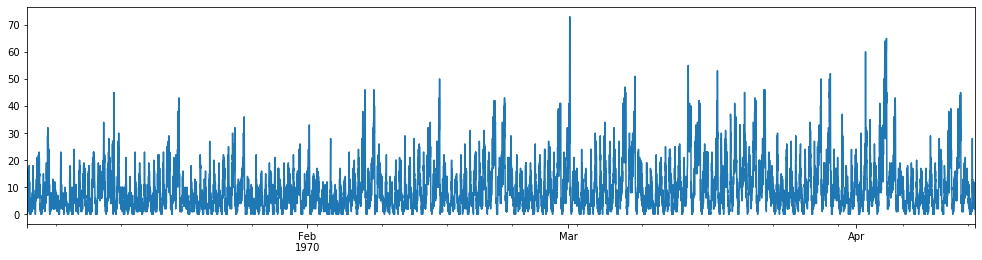

In [84]:
plt.figure(figsize=(17, 4))
ts.plot()

Approximately 4 peaks be seen each month which means there is a weekly trend in the dataset.

In [113]:
arr = [-4, 3, -9, 0, 4, 1] 
z = []
p = []
n = []

for x in arr:
    if(x == 0):
        z.append(x)
    if(x > 0):
        p.append(x)
    elif(x < 0):
        n.append(x)
print(sum(z)/len(arr))
print(sum(p)/len(arr))
print(sum(n)/len(arr))

0.0
1.3333333333333333
-2.1666666666666665


In [ ]:
# Analyzing each week


